In [1]:
import tensorflow as tf

In [4]:
import os
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from random import choices
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout

In [5]:
#input_path='/Users/apple/Documents/2021 summer intern/archive'
input_path='/your_path'

In [6]:
for file in os.listdir(input_path):
    print(file)

brain_tumor_dataset
no
yes


In [7]:
type1=len(os.listdir(input_path+'/no'))
type2=len(os.listdir(input_path+'/yes'))

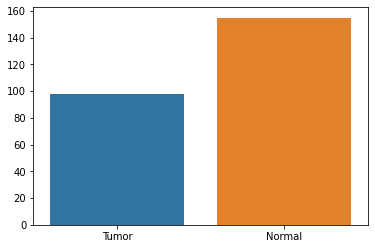

In [8]:
count=[type1,type2]
label=['Tumor','Normal']

sns.barplot(label,count)

In [9]:
def show_image(folder):
    path=os.path.join(input_path,folder)
    
    images=choices(os.listdir(path),k=4)
    images=[os.path.join(path,file) for file in images]
    
    return images

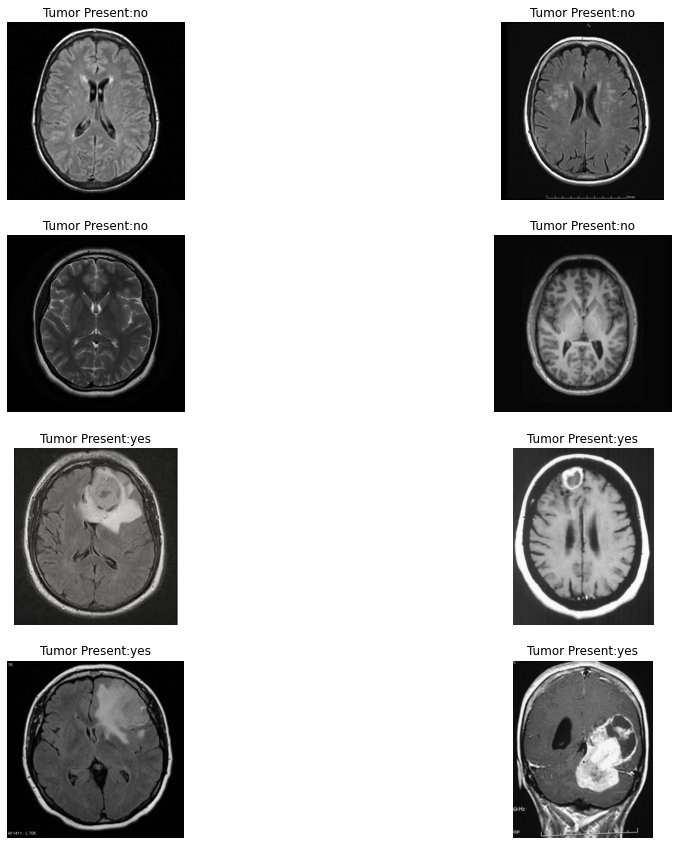

In [10]:
img1=show_image('no')
img2=show_image('yes')
label1=['no']*4
label2=['yes']*4

images=img1+img2
labels=label1+label2

plt.figure(figsize=(16,15))

for i,path_name in enumerate(images):
    plt.subplot(4,2,i+1)
    image=cv.imread(path_name)
    plt.imshow(image)
    plt.title("Tumor Present:"+labels[i])
    plt.axis('off')

In [13]:
dataaug=ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5],
                             validation_split=0.2
                            )
train_aug= dataaug.flow_from_directory(input_path,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='training'
                                      )
val_aug = dataaug.flow_from_directory( input_path,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='validation'
                                      )

Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [26]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [46]:
# This cell updates result list for images with tumor
from PIL import Image
data = []
paths = []
result = []

for r, d, f in os.walk(r'/Users/apple/Documents/2021 summer intern/archive/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [47]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/Users/apple/Documents/2021 summer intern/archive/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [48]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [49]:
result = np.array(result)
#result.shape
result = result.reshape(139,2)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [51]:
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [52]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 7s 1s/step - loss: 11.4998 - val_loss: 16.5048
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 10.5435 - val_loss: 56.9539
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 5.0616 - val_loss: 41.8804
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 3.3065 - val_loss: 13.1187
Epoch 5/30
3/3 [==============================] - 5s 1s/step - loss: 3.6798 - val_loss: 8.0594
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 3.0029 - val_loss: 8.9574
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 0.2105 - val_loss: 16.8224
Epoch 8/30
3/3 [==============================] - 4s 1s/step - loss: 1.5387 - val_loss: 13.5990
Epoch 9/30
3/3 [==============================] - 4s 1s/step - loss: 0.6636 - val_loss: 6.7781
Epoch 10/30
3/3 [==============================] - 4s 1s/step - loss: 0.3227 - val_loss: 5.3724
Epoch 11/30
3/3 [========================

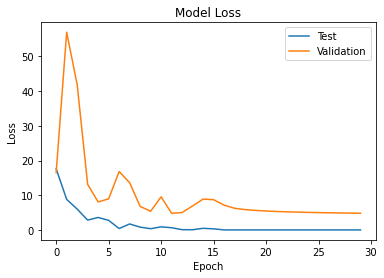

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [54]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


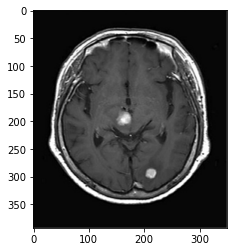

In [55]:
from matplotlib.pyplot import imshow
img = Image.open(r"/Users/apple/Documents/2021 summer intern/archive/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


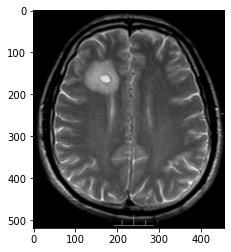

In [57]:
img = Image.open(r"/Users/apple/Documents/2021 summer intern/archive/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))